# Visualization Assignment 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython import display
%matplotlib inline

## Question 1

Create an animated graph

In [2]:
x = np.linspace(0, 2*np.pi,100)
fig = plt.figure()

lines = plt.plot([])
line = lines[0]

plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)
def animate(frame):
    y = np.sin(x + 2*np.pi * frame/100)
    line.set_data((x,y))
    
anim = FuncAnimation(fig, animate, frames=100,interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [3]:
fig = plt.figure()

lines = plt.plot([],'o')
line = lines[0]
plt.axis('scaled')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

def animate(frame):
    x = np.cos(frame/100*2*np.pi)
    y = np.sin(frame/100*2*np.pi)
    line.set_data((x,y))
    
anim = FuncAnimation(fig, animate, frames=100,interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

## Question 2

Plotting Latitudes and Longitudes in a map

In [33]:
from mpl_toolkits.basemap import Basemap

In [35]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

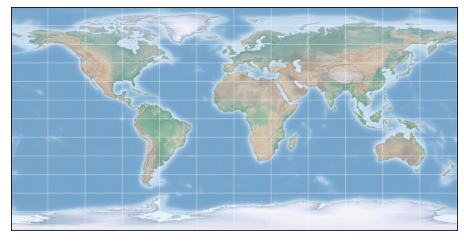

In [36]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

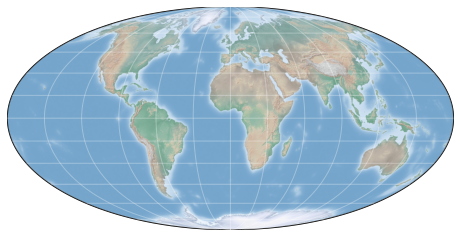

In [37]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

In [4]:
df_day = pd.read_csv('Bike-Sharing-Dataset/day.csv')
df_hour = pd.read_csv('Bike-Sharing-Dataset/hour.csv')

In [5]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [8]:
df_day.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [9]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [11]:
df_hour.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

## Question 3

([<matplotlib.axis.XTick at 0x2245411ce10>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

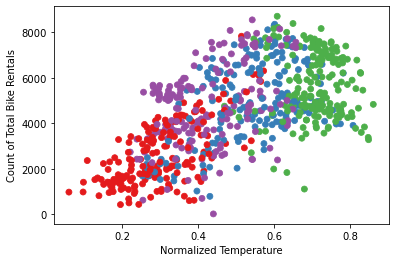

In [12]:
sns.scatterplot(x = 'temp', y = 'cnt',hue = df_day['season'].tolist(),data = df_day,palette ='Set1',legend =False,edgecolor = None)
plt.xlabel('Normalized Temperature')
plt.ylabel('Count of Total Bike Rentals')
plt.xticks([0.2,0.4,0.6,0.8])


## Question 4

In [13]:
df = pd.read_csv('Bike-Sharing-Dataset/day.csv')
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall/Autumn',4:'Winter'})
df['season'].value_counts()

Fall/Autumn    188
Summer         184
Spring         181
Winter         178
Name: season, dtype: int64

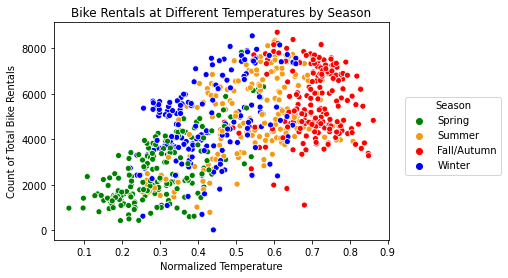

In [14]:
seasons = ['Spring','Summer','Fall/Autumn','Winter']
colors = ["green",'#F39C12','red', "blue"]
sns.set_palette(sns.color_palette(colors))
seasons = ['Spring','Summer','Fall/Autumn','Winter']
ax = sns.scatterplot(x = 'temp', y = 'cnt',hue = df['season'].tolist(),data = df)
plt.xlabel('Normalized Temperature')
plt.ylabel('Count of Total Bike Rentals')
plt.title('Bike Rentals at Different Temperatures by Season')
ax.legend(title ='Season',loc = (1.05,0.3))


## Question 5

In [15]:
group1 = df.groupby('season')

In [16]:
summer = group1.get_group('Summer')
spring = group1.get_group('Spring')
winter = group1.get_group('Winter')
fall = group1.get_group('Fall/Autumn')

[Text(0.5, 0, ''), Text(0, 0.5, ''), Text(0.5, 1.0, 'Winter')]

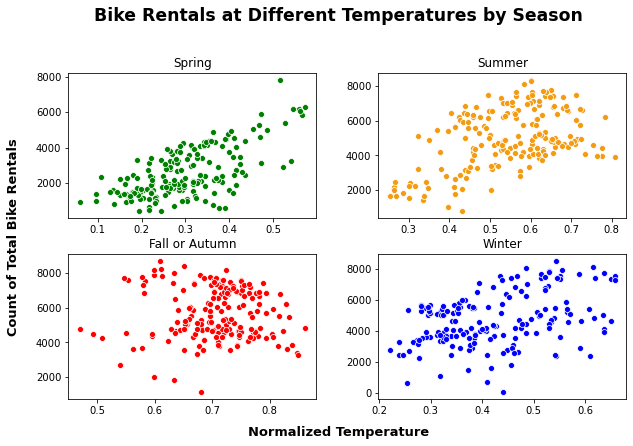

In [17]:
alignment_h={'fontsize':'xx-large','fontweight':'bold'}
alignment1 = {'fontsize':13,'fontweight':'bold'}
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10, 6))
fig.text(0.5, 0.04, 'Normalized Temperature', ha='center',**alignment1)
fig.text(0.04, 0.5, 'Count of Total Bike Rentals', va='center', rotation='vertical',**alignment1)
fig.text(0.5, 1, 'Bike Rentals at Different Temperatures by Season', ha='center',**alignment_h)
plt.subplots_adjust(wspace = 0.25,hspace=0.25)
plt.subplot(2,2,1)
ax1 = sns.scatterplot(x = 'temp', y = 'cnt',data = spring,color='g')
ax1.set(xlabel='',ylabel='',title='Spring')
plt.subplot(2,2,2)
ax2 = sns.scatterplot(x = 'temp', y = 'cnt',data = summer,color='#F39C12')
ax2.set(xlabel='',ylabel='',title='Summer')
plt.subplot(2,2,3)
ax3 = sns.scatterplot(x = 'temp', y = 'cnt',data = fall,color='r')
ax3.set(xlabel='',ylabel='',title='Fall or Autumn')
plt.subplot(2,2,4)
ax4 = sns.scatterplot(x = 'temp', y = 'cnt',data = winter,color='blue')
ax4.set(xlabel='',ylabel='',title='Winter')


## Question 6

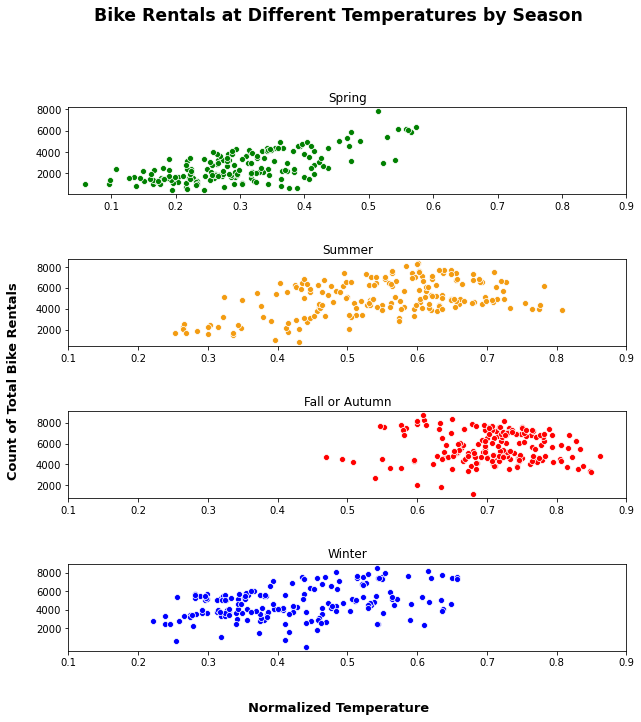

In [18]:
alignment_h={'fontsize':'xx-large','fontweight':'bold'}
alignment1 = {'fontsize':13,'fontweight':'bold'}
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True, figsize=(10, 10))
fig.text(0.5, 0.04, 'Normalized Temperature', ha='center',**alignment1)
fig.text(0.04, 0.5, 'Count of Total Bike Rentals', va='center', rotation='vertical',**alignment1)
fig.text(0.5, 1, 'Bike Rentals at Different Temperatures by Season', ha='center',**alignment_h)
plt.subplots_adjust(wspace = 0.25,hspace=0.75)
plt.subplot(4,1,1)
ax1 = sns.scatterplot(x = 'temp', y = 'cnt',data = spring,color='g')
ax1.set(xlabel='',ylabel='',title='Spring')
ax1.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax1.set_yticks([2000,4000,6000,8000])
plt.subplot(4,1,2)
ax2 = sns.scatterplot(x = 'temp', y = 'cnt',data = summer,color='#F39C12')
ax2.set(xlabel='',ylabel='',title='Summer')
ax2.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax2.set_yticks([2000,4000,6000,8000])
plt.subplot(4,1,3)
ax3 = sns.scatterplot(x = 'temp', y = 'cnt',data = fall,color='r')
ax3.set(xlabel='',ylabel='',title='Fall or Autumn')
ax3.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax3.set_yticks([2000,4000,6000,8000])
plt.subplot(4,1,4)
ax4 = sns.scatterplot(x = 'temp', y = 'cnt',data = winter,color='blue')
ax4.set(xlabel='',ylabel='',title='Winter')
ax4.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax4.set_yticks([2000,4000,6000,8000])


## Question 7

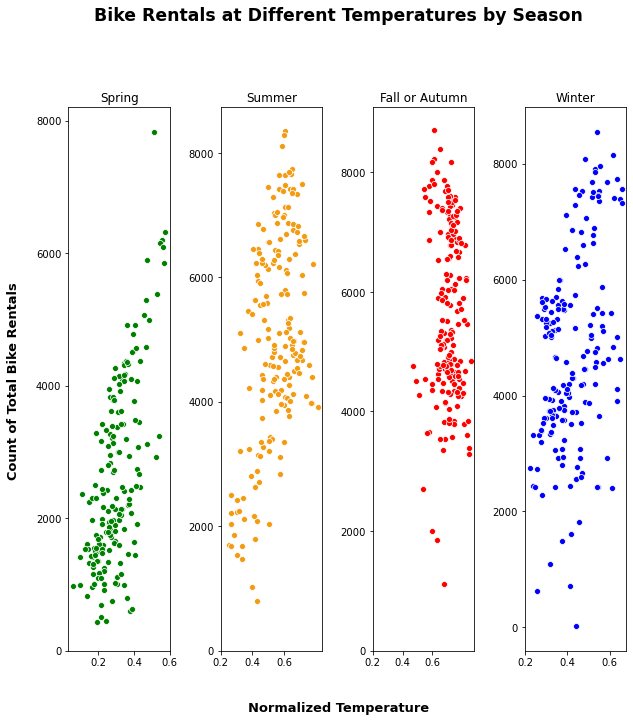

In [19]:
alignment_h={'fontsize':'xx-large','fontweight':'bold'}
alignment1 = {'fontsize':13,'fontweight':'bold'}

fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True, figsize=(10, 10))
fig.text(0.5, 0.04, 'Normalized Temperature', ha='center',**alignment1)
fig.text(0.04, 0.5, 'Count of Total Bike Rentals', va='center', rotation='vertical',**alignment1)
fig.text(0.5, 1, 'Bike Rentals at Different Temperatures by Season', ha='center',**alignment_h)
plt.subplots_adjust(wspace = 0.5,hspace=0.75)
plt.subplot(1,4,1)
ax1 = sns.scatterplot(x = 'temp', y = 'cnt',data = spring,color='g')
ax1.set(xlabel='',ylabel='',title='Spring')
ax1.set_xticks([0.2,0.4,0.6])
ax1.set_yticks([0,2000,4000,6000,8000])
plt.subplot(1,4,2)
ax2 = sns.scatterplot(x = 'temp', y = 'cnt',data = summer,color='#F39C12')
ax2.set(xlabel='',ylabel='',title='Summer')
ax2.set_xticks([0.2,0.4,0.6])
ax2.set_yticks([0,2000,4000,6000,8000])
plt.subplot(1,4,3)
ax3 = sns.scatterplot(x = 'temp', y = 'cnt',data = fall,color='r')
ax3.set(xlabel='',ylabel='',title='Fall or Autumn')
ax3.set_xticks([0.2,0.4,0.6])
ax3.set_yticks([0,2000,4000,6000,8000])
plt.subplot(1,4,4)
ax4 = sns.scatterplot(x = 'temp', y = 'cnt',data = winter,color='blue')
ax4.set(xlabel='',ylabel='',title='Winter')
ax4.set_xticks([0.2,0.4,0.6])
ax4.set_yticks([0,2000,4000,6000,8000])


## Question 8

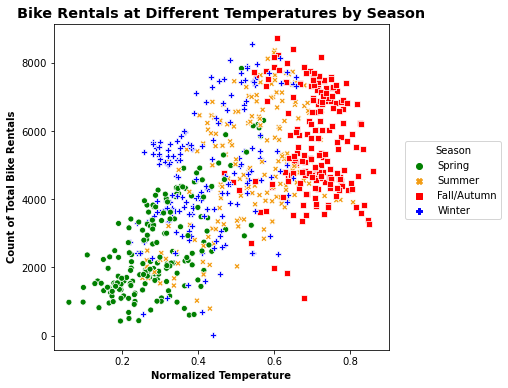

In [20]:
seasons = ['Spring','Summer','Fall/Autumn','Winter']
colors = ["green",'#F39C12','red', "blue"]
sns.set_palette(sns.color_palette(colors))
alignment_h={'fontsize':'x-large','fontweight':'bold'}
alignment1 = {'fontsize':10,'fontweight':'bold'}
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x = 'temp', y = 'cnt',hue = df['season'].tolist(),style= df['season'].tolist(),data = df)
plt.xlabel('Normalized Temperature',**alignment1)
plt.xticks([0.2,0.4,0.6,0.8])
plt.ylabel('Count of Total Bike Rentals',**alignment1)
plt.title('Bike Rentals at Different Temperatures by Season',**alignment_h)
ax.legend(title ='Season',loc = (1.05,0.4))

## Question 9

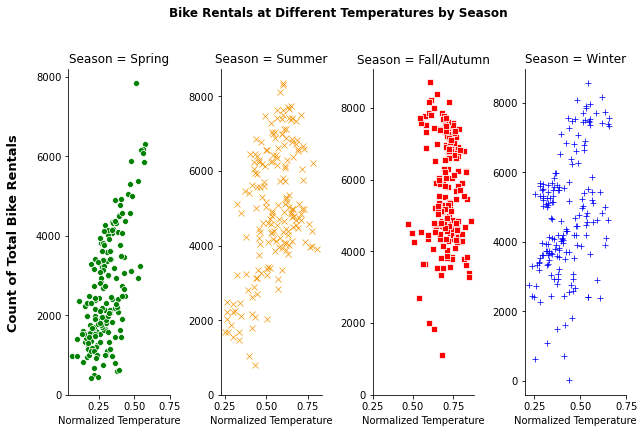

In [21]:
alignment_h={'fontsize':'large','fontweight':'bold'}
alignment1 = {'fontsize':13,'fontweight':'bold'}

fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True, figsize=(10, 6))
fig.text(0.04, 0.5, 'Count of Total Bike Rentals', va='center', rotation='vertical',**alignment1)
fig.text(0.5, 1, 'Bike Rentals at Different Temperatures by Season', ha='center',**alignment_h)
plt.subplots_adjust(wspace = 0.5,hspace=0.75)
plt.subplot(1,4,1)
ax1 = sns.scatterplot(x = 'temp', y = 'cnt',data = spring,color='g')
ax1.set(xlabel='Normalized Temperature',ylabel='',title='Season = Spring')
ax1.set_xticks([0.25,0.50,0.75])
ax1.set_yticks([0,2000,4000,6000,8000])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.subplot(1,4,2)
ax2 = sns.scatterplot(x = 'temp', y = 'cnt',data = summer,marker ='x',color='#F39C12')
ax2.set(xlabel='Normalized Temperature',ylabel='',title='Season = Summer')
ax2.set_xticks([0.25,0.50,0.75])
ax2.set_yticks([0,2000,4000,6000,8000])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.subplot(1,4,3)
ax3 = sns.scatterplot(x = 'temp', y = 'cnt',data = fall,marker ='s',color='r')
ax3.set(xlabel='Normalized Temperature',ylabel='',title='Season = Fall/Autumn')
ax3.set_xticks([0.25,0.50,0.75])
ax3.set_yticks([0,2000,4000,6000,8000])
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.subplot(1,4,4)
ax4 = sns.scatterplot(x = 'temp', y = 'cnt',data = winter,marker ='+',color='blue')
ax4.set(xlabel='Normalized Temperature',ylabel='',title='Season = Winter')
ax4.set_xticks([0.25,0.50,0.75])
ax4.set_yticks([0,2000,4000,6000,8000])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)



## Question 10

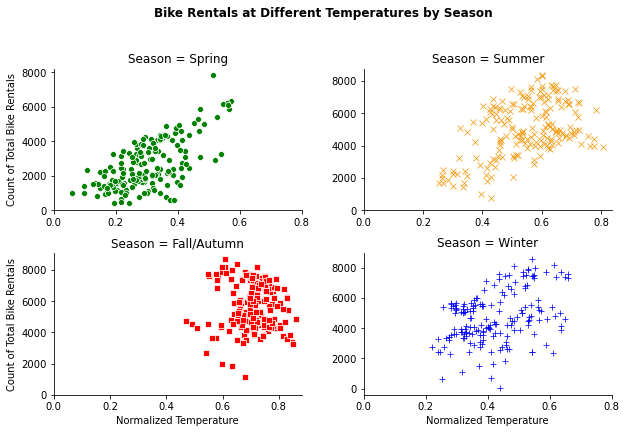

In [22]:
alignment_h={'fontsize':'large','fontweight':'bold'}
alignment1 = {'fontsize':13,'fontweight':'bold'}

fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True, figsize=(10, 6))

fig.text(0.5, 1, 'Bike Rentals at Different Temperatures by Season', ha='center',**alignment_h)
plt.subplots_adjust(wspace = 0.25,hspace=0.3)
plt.subplot(2,2,1)
ax1 = sns.scatterplot(x = 'temp', y = 'cnt',data = spring,color='g')
ax1.set(xlabel='',ylabel='Count of Total Bike Rentals',title='Season = Spring')
ax1.set_xticks([0,0.2,0.4,0.6,0.8])
ax1.set_yticks([0,2000,4000,6000,8000])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.subplot(2,2,2)
ax2 = sns.scatterplot(x = 'temp', y = 'cnt',data = summer,marker ='x',color='#F39C12')
ax2.set(xlabel='',ylabel='',title='Season = Summer')
ax2.set_xticks([0,0.2,0.4,0.6,0.8])
ax2.set_yticks([0,2000,4000,6000,8000])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.subplot(2,2,3)
ax3 = sns.scatterplot(x = 'temp', y = 'cnt',data = fall,marker ='s',color='r')
ax3.set(xlabel='Normalized Temperature',ylabel='Count of Total Bike Rentals',title='Season = Fall/Autumn')
ax3.set_xticks([0,0.2,0.4,0.6,0.8])
ax3.set_yticks([0,2000,4000,6000,8000])
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.subplot(2,2,4)
ax4 = sns.scatterplot(x = 'temp', y = 'cnt',data = winter,marker ='+',color='blue')
ax4.set(xlabel='Normalized Temperature',ylabel='',title='Season = Winter')
ax4.set_xticks([0,0.2,0.4,0.6,0.8])
ax4.set_yticks([0,2000,4000,6000,8000])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

